In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
penguins = pd.read_csv('penguins_size.csv')

In [73]:
print(penguins.info())
print(penguins.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torge

In [74]:
print(penguins.isnull().sum())
# Filling numerical nulls with median
for column in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    penguins[column] = penguins.groupby('species')[column].transform(
        lambda x: x.fillna(x.median()))
# Filling categorical nulls with unknown
penguins['sex'] = penguins['sex'].fillna('unknown')
# We should not remove duplicates as multiple penguins can have the same measurements
# penguins = penguins.drop_duplicates()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [75]:
# Function to Upper and Lower bounds in any column for detecting outliers
def get_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [76]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.916860,17.148547,200.927326,4202.616279
std,5.453713,1.973601,14.056652,801.231551
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.575000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.250000,4756.250000
max,59.600000,21.500000,231.000000,6300.000000


In [77]:
# Detect outliers for each numerical column and replace them with the lower and upper bounds
for column in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    lower_bound, upper_bound = get_bounds(penguins, column)
    print(lower_bound, upper_bound)
    penguins[column] = np.where(
        penguins[column] < lower_bound,
        lower_bound,
        np.where(
            penguins[column] > upper_bound,
            upper_bound,
            penguins[column]
        )
    )
penguins.describe()

25.250000000000007 62.449999999999996
10.8875 23.3875
155.125 248.125
1740.625 6565.625


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.916860,17.148547,200.927326,4202.616279
std,5.453713,1.973601,14.056652,801.231551
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.575000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.250000,4756.250000
max,59.600000,21.500000,231.000000,6300.000000


In [79]:
# Making sure that the sex column values are consistent 
# penguins['sex'] = penguins['sex'].str.upper()
penguins['sex'] = np.where((penguins['sex']!="MALE") & (penguins['sex']!="FEMALE"), "UNKNOWN", penguins['sex'])
print(penguins['sex'].unique())
print(penguins['island'].unique())
print(penguins['species'].unique())

['MALE' 'FEMALE' 'UNKNOWN']
['Torgersen' 'Biscoe' 'Dream']
['Adelie' 'Chinstrap' 'Gentoo']


### EDA of the dataset
#### Univariate Analysis

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        344.000000       344.000000         344.000000   344.000000
mean          43.916860        17.148547         200.927326  4202.616279
std            5.453713         1.973601          14.056652   801.231551
min           32.100000        13.100000         172.000000  2700.000000
25%           39.200000        15.575000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.250000  4756.250000
max           59.600000        21.500000         231.000000  6300.000000


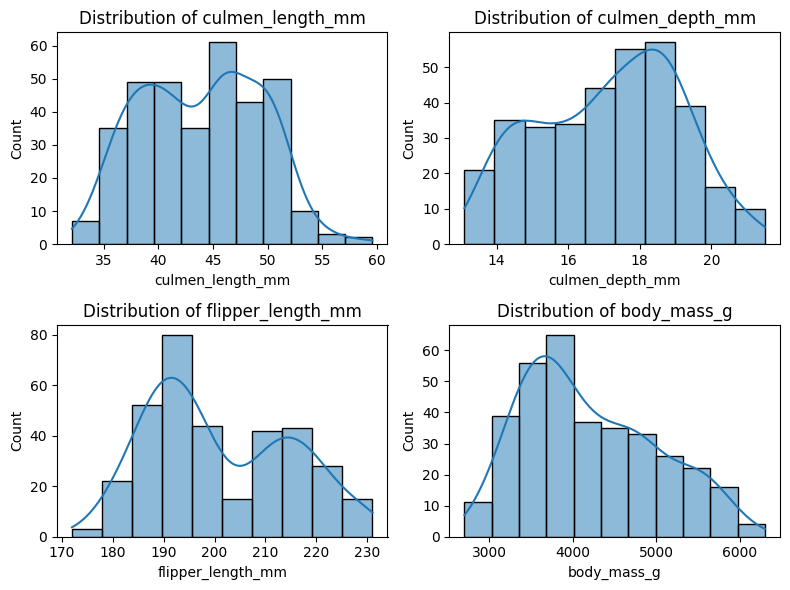

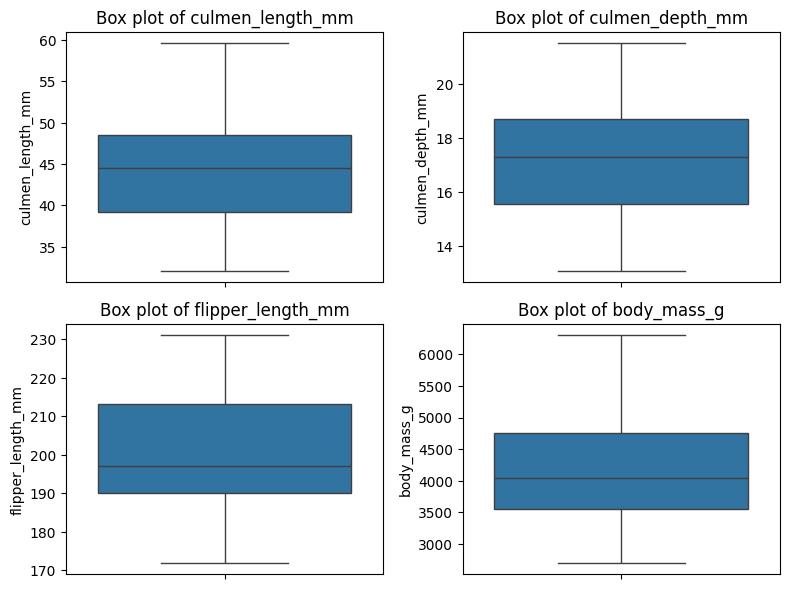

In [86]:
# Summary statistics
print(penguins.describe())

# Create histograms for each numerical variable
plt.figure(figsize=(8, 6))
for i, column in enumerate(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    plt.subplot(2, 2, i+1)
    sns.histplot(penguins[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Create box plots for each numerical variable
plt.figure(figsize=(8, 6))
for i, column in enumerate(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=penguins[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

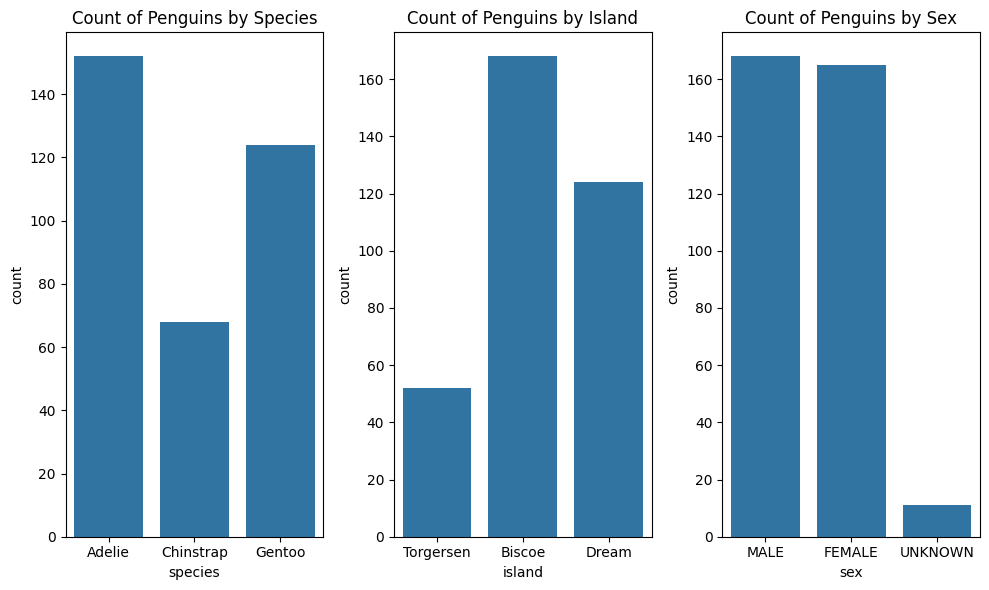

In [94]:
# Frequency distribution of species
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='species', data=penguins)
plt.title('Count of Penguins by Species')

# Frequency distribution of island
plt.subplot(1, 3, 2)
sns.countplot(x='island', data=penguins)
plt.title('Count of Penguins by Island')

# Frequency distribution of sex
plt.subplot(1, 3, 3)
sns.countplot(x='sex', data=penguins)
plt.title('Count of Penguins by Sex')

plt.tight_layout()
plt.show()


#### Bivariate Analysis

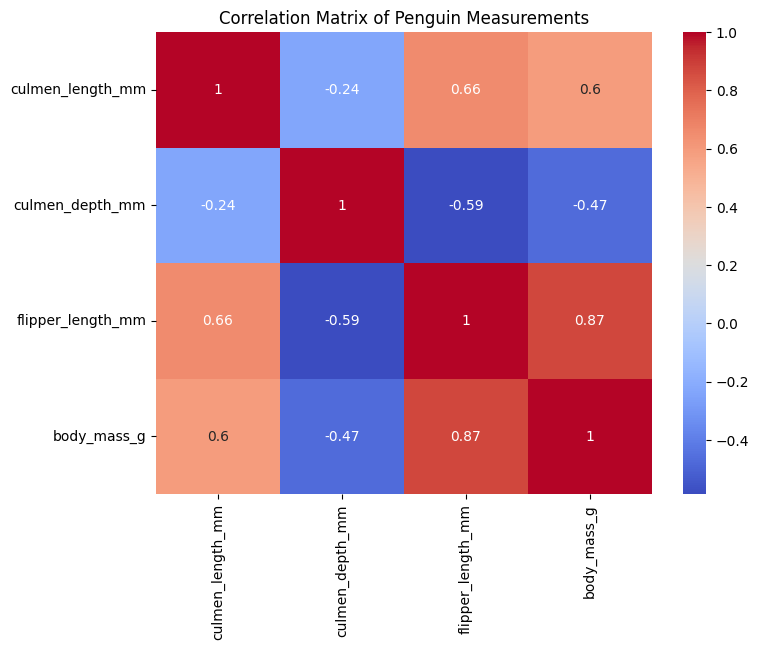

In [98]:
# Correlation matrix
correlation_matrix = penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Penguin Measurements')
plt.show()

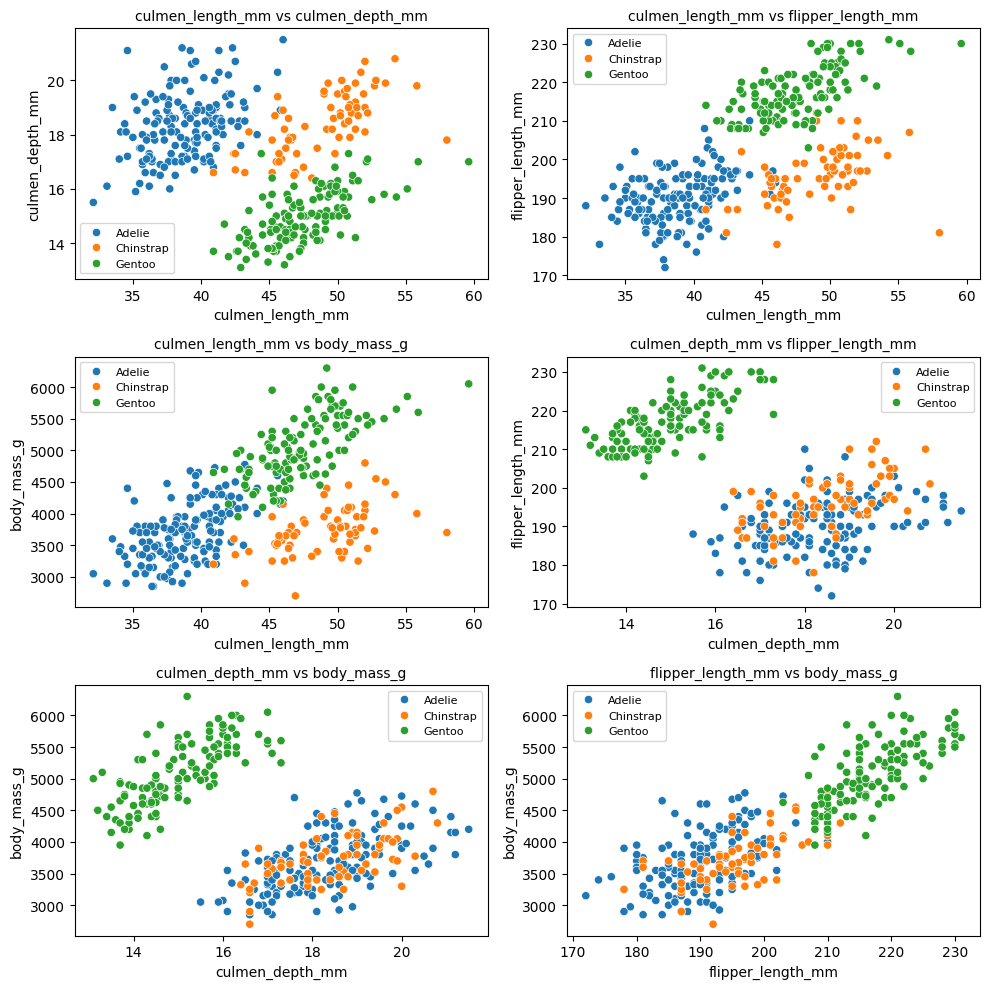

In [117]:
# Scatter plots for pairs of numerical fields. For 4 distinct field there will be 6 different scatterplots 
plt.figure(figsize=(10, 10))
fields=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
k=1
for i, x_var in enumerate(fields):
    for j in range(i+1,len(fields)):
        y_var=fields[j]
        plt.subplot(3, 2, k)
        k+=1
        sns.scatterplot(x=x_var, y=y_var, hue='species', data=penguins)
        plt.title(f'{x_var} vs {y_var}', fontsize=10)
        plt.legend(fontsize=8)  # Reduce legend text size

plt.tight_layout()
plt.show()

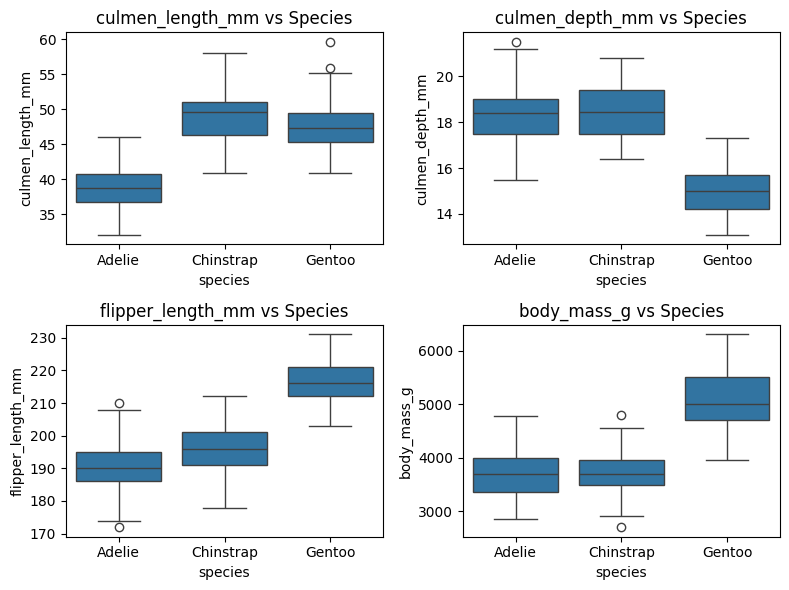

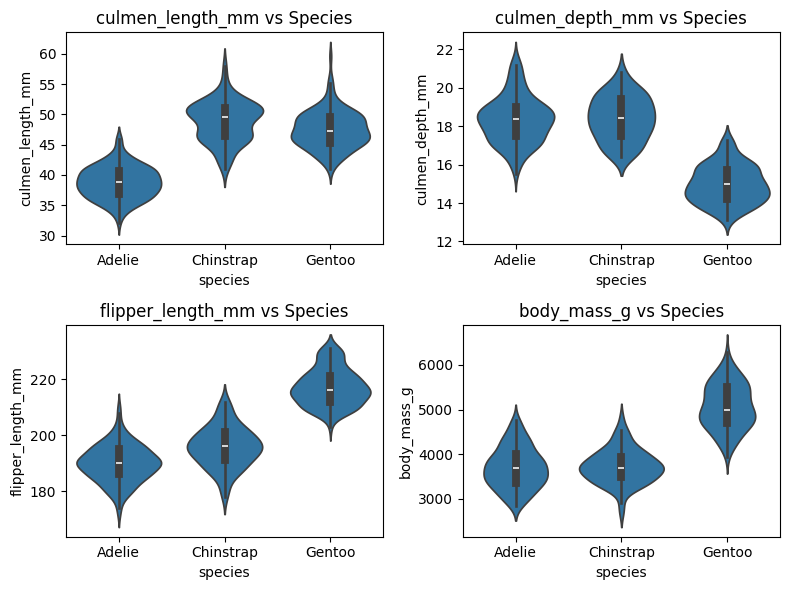

In [123]:
# Box plots to compare numerical variables across species
plt.figure(figsize=(8, 6))
for i, column in enumerate(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=column, data=penguins)
    plt.title(f'{column} vs Species')
plt.tight_layout()
plt.show()

# Violin plots for better distribution visualization
plt.figure(figsize=(8, 6))
for i, column in enumerate(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=column, data=penguins)
    plt.title(f'{column} vs Species')
plt.tight_layout()
plt.show()